# Bike RNN

## Normal RNN

Build an RNN model with bike data and use weekday and hour information to predict the number of bike.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('bike_rnn.csv')
df

,num,weekday,hour
0,0,5,17
1,1,5,17
2,1,5,17
3,2,5,17
4,4,5,17
...,...,...,...
45944,6,2,15
45945,6,2,15
45946,6,2,15
45947,6,2,15


In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

2025-04-21 07:05:43.571364: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 07:05:43.572173: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-21 07:05:43.577542: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-21 07:05:43.591413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745219143.615763 1576535 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745219143.62

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
# Normalization: The MinMaxScaler scales the weekday and hour features to the range [0, 1] to improve model performance.
scaler = MinMaxScaler()
df[['weekday', 'hour']] = scaler.fit_transform(df[['weekday', 'hour']])

In [5]:
X = df[['weekday', 'hour']].values
y = df['num'].values

In [6]:
# Reshape X for RNN input (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1]) # 1 timestep since each row is independent

In [7]:
print(X.shape, y.shape)

(45949, 1, 2) (45949,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build the RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

E0000 00:00:1745219218.508828 1576535 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745219218.512666 1576535 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/rnd/hieng/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 90.1779 - mae: 6.4557 - val_loss: 63.2025 - val_mae: 6.3146
Epoch 2/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 64.6428 - mae: 6.4000 - val_loss: 56.9475 - val_mae: 6.0707
Epoch 3/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 58.5498 - mae: 6.1798 - val_loss: 55.9774 - val_mae: 6.0915
Epoch 4/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 57.6351 - mae: 6.1554 - val_loss: 55.7633 - val_mae: 6.0011
Epoch 5/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56.3161 - mae: 6.0478 - val_loss: 55.6108 - val_mae: 6.1248
Epoch 6/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56.5383 - mae: 6.0816 - val_loss: 55.3064 - val_mae: 5.9719
Epoch 7/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56.7061 - mae: 6.0720 - val_loss: 55.1856 - val_mae: 6.0812
Epoch 8/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56.4023 - mae: 6.0851 - val_loss: 54.9355 - val_mae: 6.0179
Epoch 9/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 

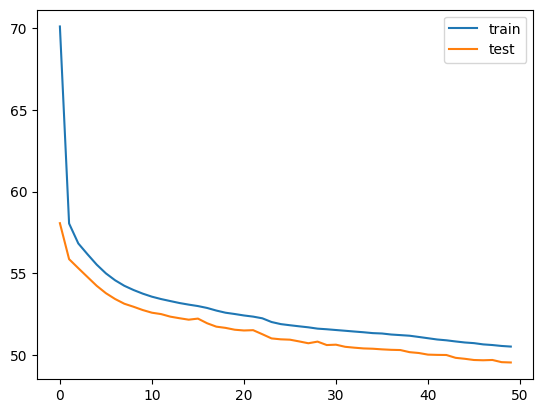

In [13]:
# Plot the loss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [14]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Mean Absolute Error: {mae}')

288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.2127 - mae: 5.6452
Test Loss: 49.55956268310547, Test Mean Absolute Error: 5.708705425262451


In [15]:
predictions = model.predict(X_test)
for i in range(5):
    print(f'Actual: {y_test[i]}, Predicted: {predictions[i][0]}')

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Actual: 3, Predicted: 5.476264953613281
Actual: 1, Predicted: 9.290060997009277
Actual: 26, Predicted: 12.717727661132812
Actual: 3, Predicted: 11.384896278381348
Actual: 1, Predicted: 6.13854455947876


In [16]:
model.save('bike_rnn_50_epochs.h5')

## LSTM

In this experiment, we choose 3 features and 6 timesteps.

In [43]:
df = pd.read_csv('bike_rnn.csv')
df

,num,weekday,hour
0,0,5,17
1,1,5,17
2,1,5,17
3,2,5,17
4,4,5,17
...,...,...,...
45944,6,2,15
45945,6,2,15
45946,6,2,15
45947,6,2,15


In [52]:
print(df.head(1))

   num  weekday  hour
0    0        5    17


In [45]:
features = ['weekday', 'hour', 'num']
target = 'num'

In [46]:
# Normalize features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

In [55]:
print(df_scaled[0])
print(df_scaled[1])

[0.83333333 0.73913043 0.        ]
[0.83333333 0.73913043 0.03333333]


In [47]:
# Define function to create sequences
def create_sequences(data, time_steps=6):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :])  # Use all 3 features as input
        y.append(data[i + time_steps, 0])  # predict next num value
    return np.array(X), np.array(y)

In [63]:
# Prepare data
time_steps = 6
X, y = create_sequences(df_scaled, time_steps)
print(X.shape, y.shape)
# print(X[0:10])
# print(y[0:10])

(45943, 6, 3) (45943,)


In [64]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Create an LSTM model
# lstm_model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])), # Two input features
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(50),
#     tf.keras.layers.Dense(25, activation='relu'),
#     tf.keras.layers.Dense(1) # One output feature for num
# ])

# lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
# lstm_model.summary()

# Build LSTM model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(time_steps, 3)),  # 3 input features
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)  # Predicting 'num'
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.summary()

c:\Users\maohi\master-degree\learn_ai\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 6, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0156 - mae: 0.0412 - val_loss: 2.6118e-04 - val_mae: 0.0080
Epoch 2/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.5170e-04 - mae: 0.0064 - val_loss: 1.7213e-04 - val_mae: 0.0031
Epoch 3/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.4175e-04 - mae: 0.0046 - val_loss: 1.2279e-04 - val_mae: 0.0031
Epoch 4/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.6617e-04 - mae: 0.0051 - val_loss: 5.6290e-05 - val_mae: 0.0021
Epoch 5/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.3509e-04 - mae: 0.0045 - val_loss: 3.3534e-05 - val_mae: 0.0030
Epoch 6/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.5176e-04 - mae: 0.0034 - val_loss: 2.0508e-05 - val_mae: 9.1495e-04
Epoch 7/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.4562e-04 - mae: 0.0038 - val_loss: 1.8893e-05 - val_mae: 7.4788e-04
Epoch 8/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.3265e-04 - mae: 0.0027 - val_loss: 

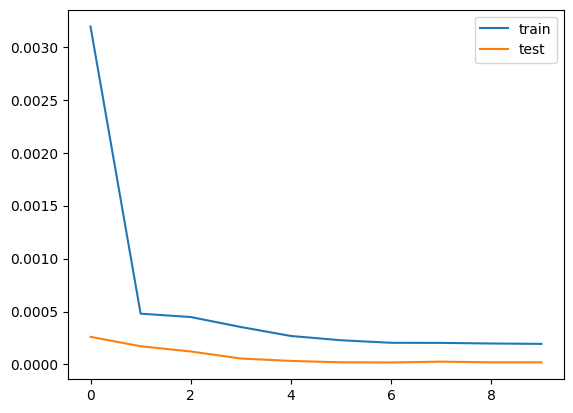

In [74]:
# Plot the training and loss graph
plt.plot(lstm_history.history['loss'], label='train')
plt.plot(lstm_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [75]:
# Predict
lstm_predictions = lstm_model.predict(X_test)

# Reshape predictions for inverse transformation
predictions = predictions.reshape(-1, 1)

# Create a placeholder array to inverse transform
inverse_input = np.zeros((predictions.shape[0], 3))  # 3 features in original scaling
inverse_input[:, 0] = predictions[:, 0]  # Replace only the 'num' column

# Inverse transform only the 'num' column
num_predictions = scaler.inverse_transform(inverse_input)[:, 0]

print(num_predictions[:10])  # Show first 10 predictions


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[32.85758972 55.74036598 76.30636597 68.30937767 36.83126736 34.08881378
 44.04054165 54.34836388 38.94756603 33.07428074]


In [76]:
# Evaluate the model
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {lstm_loss}, Test Mean Absolute Error: {lstm_mae}')

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2446e-05 - mae: 0.0011
Test Loss: 2.020246392930858e-05, Test Mean Absolute Error: 0.0011292804265394807
